<a href="https://colab.research.google.com/github/HannahSRaju/ITCS6162_Group8/blob/main/ITCS6162_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessing Students Health🩺 & Academic📖 Performance🎗️

## Group 8: Hannah Raju, Harshith Vemula, Sai Manikanta Karnati, Sai Sri Mohan Datta Bayya

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://images.squarespace-cdn.com/content/v1/534f147fe4b0b5927b84c96f/1586273119783-HE8OHADU5O5DR11QVT2Q/Students-Phones.jpg")

## Project Introduction:
This project investigates the impact of mobile phone usage on students' health and academic performance. The dataset comprises various attributes related to students' demographics, mobile phone usage patterns, health symptoms, and academic outcomes. By analyzing these data points, we aim to understand how mobile phone usage affects students' academic success and well-being. The goal of this project is both descriptive and predictive: to describe current trends and predict potential outcomes based on mobile phone usage. We plan to use supervised learning techniques, specifically classification and regression analysis, to identify significant predictors of academic performance and health outcomes. This involves exploring relationships between mobile phone usage patterns (e.g., time spent, activities, and educational app usage) and variables such as performance impact, distraction, attention span, and health symptoms.

## Research Question:
How does mobile phone usage influence students' academic performance and health, and what are the key predictors of these outcomes?

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data and store in dataframe
url = 'https://raw.githubusercontent.com/HannahSRaju/ITCS6162_Group8/main/Impact_of_Mobile_Phone_on_Students_Health.csv'
df = pd.read_csv(url)

In [4]:
df

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,> 6 hours,Agree,During Exams,Yes,Internet Access,Yes,Reasarch,Headache,Sometimes,Taking Break during prolonged use,Excellent
96,Hafeez,16-20,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Strongly agree,During Class Lectures,No,Notes Taking App,No,Reasarch,Anxiety or Stress,Sometimes,Taking Break during prolonged use,Good
97,Babar,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,2-4 hours,Agree,While Studying,No,Internet Access,No,Reasarch,Headache,Never,Limiting Screen Time,Excellent
98,Rizwan,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,During Exams,No,Internet Access,Yes,Reasarch,Headache,Rarely,Limiting Screen Time,Excellent;Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span                  99 non-null     obj

In [6]:
df.isnull().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    0
Mobile phone activities           0
Helpful for studying              0
Educational Apps                  0
Daily usages                      0
Performance impact                0
Usage distraction                 0
Attention span                    0
Useful features                   0
Health Risks                      0
Beneficial subject                0
Usage symptoms                    0
Symptom frequency                 0
Health precautions                0
Health rating                     0
dtype: int64

In [8]:
df.describe()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
unique,91,4,2,1,2,4,7,2,4,4,5,4,2,4,3,3,6,4,4,7
top,Ali,21-25,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,While Studying,Yes,Internet Access,Yes,Reasarch,All of these,Sometimes,Limiting Screen Time,Good
freq,1,69,74,91,72,51,57,87,52,39,38,32,65,66,56,46,30,51,33,41


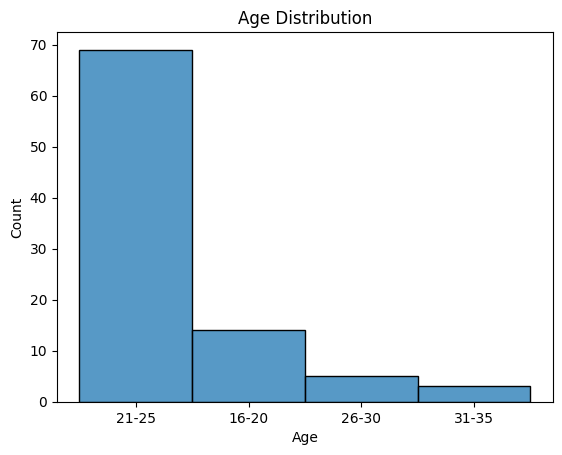

In [9]:
# Age distribution
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

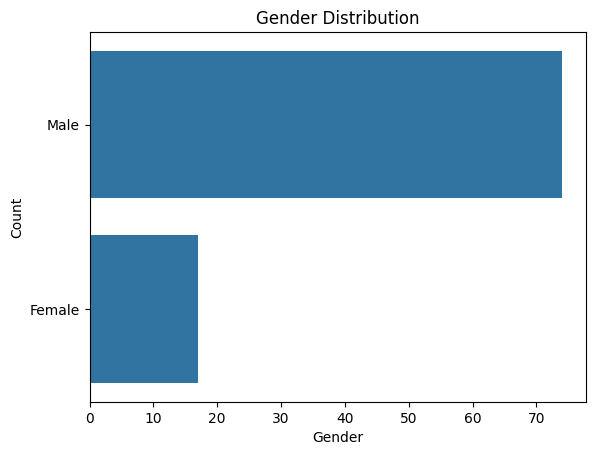

In [10]:
# Gender distribution
sns.countplot(df['Gender '])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from each cell in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Cleaned DataFrame
df

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent
5,Aammar,21-25,Male,Yes,Android,Rarely,All of these,Yes,Educational Videos,> 6 hours,Neutral,Not Distracting,Yes,Internet Access,Only Partially,Reasarch,Headache,Sometimes,None of Above,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,> 6 hours,Agree,During Exams,Yes,Internet Access,Yes,Reasarch,Headache,Sometimes,Taking Break during prolonged use,Excellent
96,Hafeez,16-20,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Strongly agree,During Class Lectures,No,Notes Taking App,No,Reasarch,Anxiety or Stress,Sometimes,Taking Break during prolonged use,Good
97,Babar,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,2-4 hours,Agree,While Studying,No,Internet Access,No,Reasarch,Headache,Never,Limiting Screen Time,Excellent
98,Rizwan,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,During Exams,No,Internet Access,Yes,Reasarch,Headache,Rarely,Limiting Screen Time,Excellent;Good


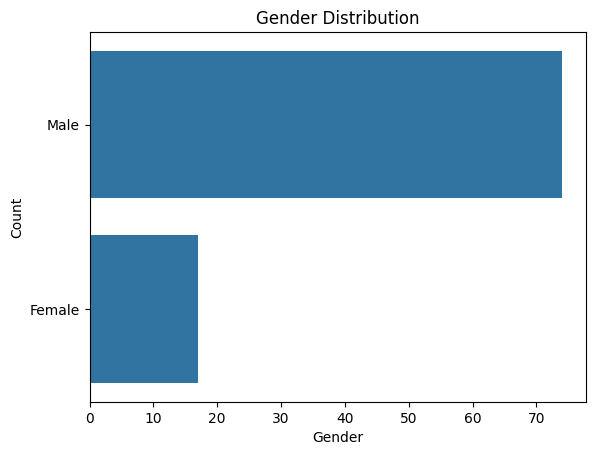

In [12]:
# Gender distribution with cleaned data
sns.countplot(df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
# View the unique values in the 'Usage symptoms' column
unique_usage_symptoms = df['Usage symptoms'].unique()
print(unique_usage_symptoms)

['Headache' 'All of these' 'Sleep disturbance' 'Anxiety or Stress'
 'Sleep disturbance;Anxiety or Stress'
 'Headache;Sleep disturbance;Anxiety or Stress;All of these']


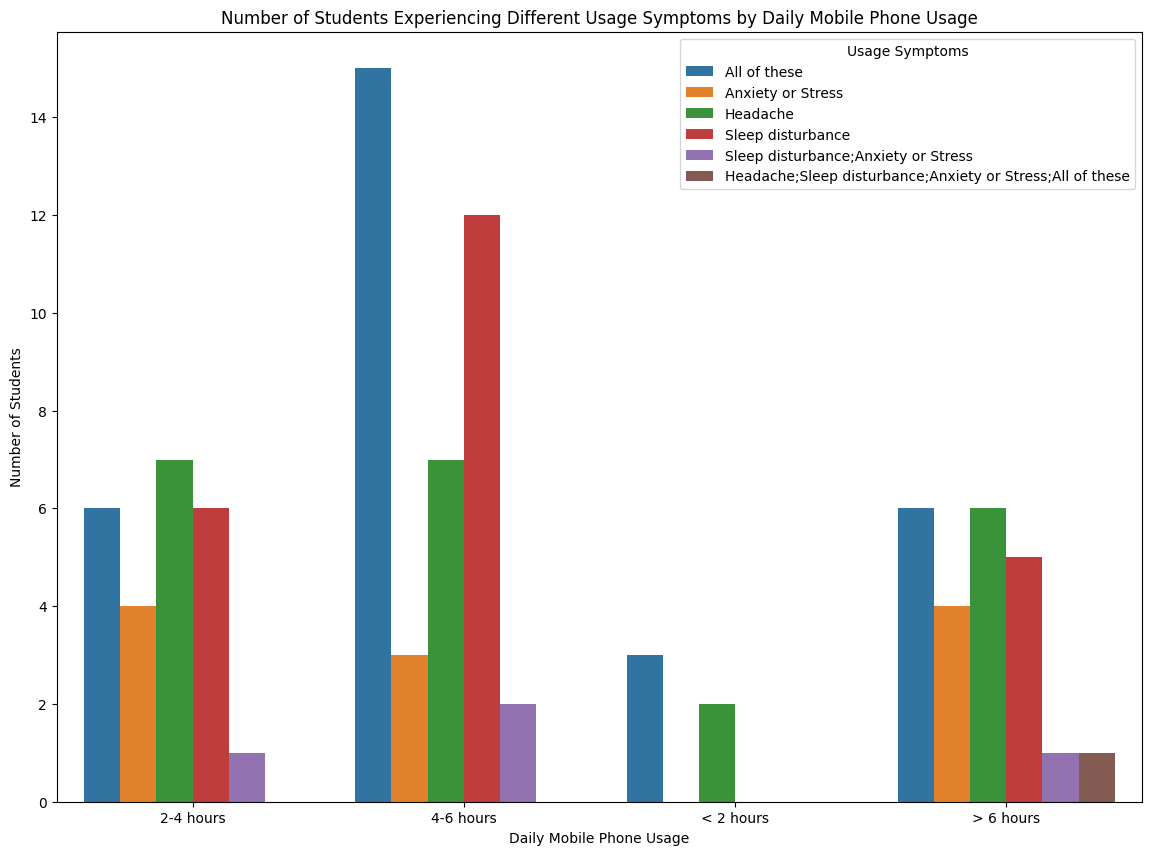

In [14]:
# Number of Students Experiencing Different Usage Symptoms by Daily Mobile Phone Usage

# Group the data by 'Daily usage' and 'Usage symptoms' and count the occurrences
symptom_counts = df.groupby(['Daily usages', 'Usage symptoms']).size().reset_index(name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(x='Daily usages', y='Count', hue='Usage symptoms', data=symptom_counts)
plt.title('Number of Students Experiencing Different Usage Symptoms by Daily Mobile Phone Usage')
plt.xlabel('Daily Mobile Phone Usage')
plt.ylabel('Number of Students')
plt.legend(title='Usage Symptoms')
plt.show()

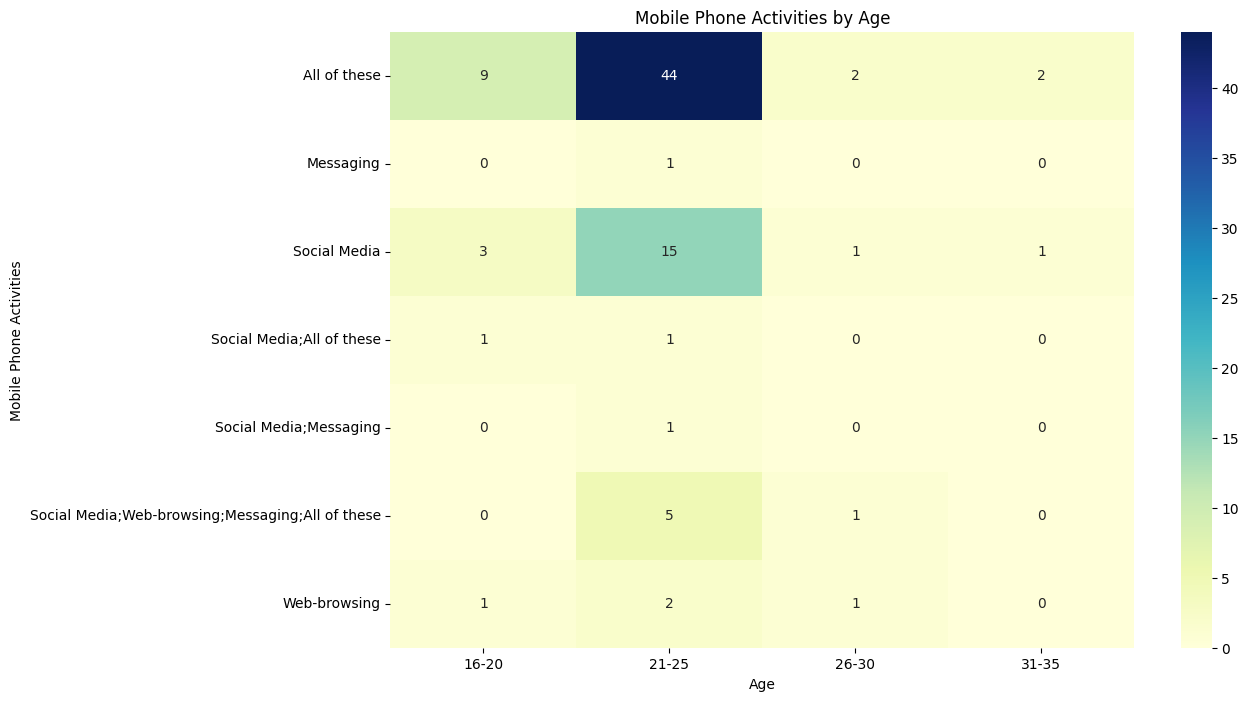

In [15]:
# 'Mobile phone activities' and 'Age'
heatmap_data = df.groupby(['Mobile phone activities', 'Age']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Mobile Phone Activities by Age')
plt.xlabel('Age')
plt.ylabel('Mobile Phone Activities')
plt.show()

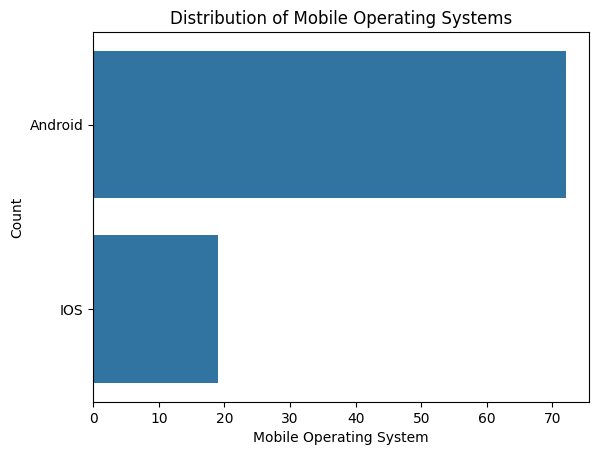

In [16]:
# Distribution of Mobile Operating Systems
sns.countplot(df['Mobile Operating System'])
plt.title('Distribution of Mobile Operating Systems')
plt.xlabel('Mobile Operating System')
plt.ylabel('Count')
plt.show()
# The graph provides a clear picture of the mobile operating system landscape among your respondents, highlighting the relative prevalence of each platform

Text(0, 0.5, 'Count')

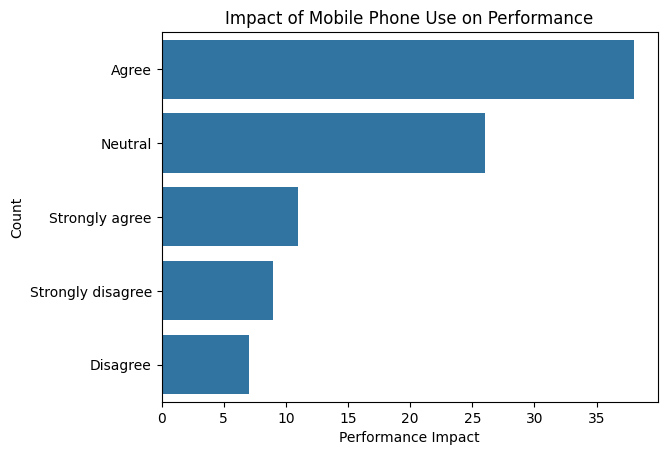

In [17]:
# Impact of Mobile Phone Use on Performance
sns.countplot(data=df['Performance impact'])
plt.title('Impact of Mobile Phone Use on Performance')
plt.xlabel('Performance Impact')
plt.ylabel('Count')
# This analysis helps in understanding user perceptions and can be used to address potential issues related to mobile phone usage and performance in educational or work settings.

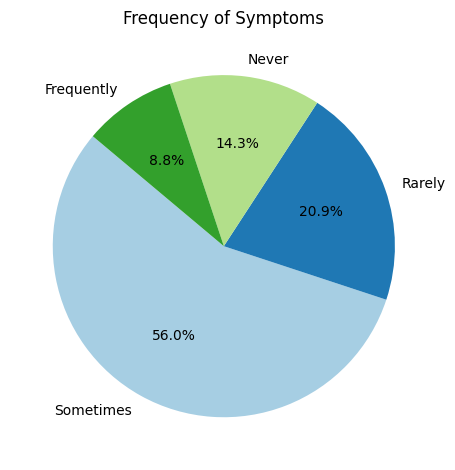

In [18]:
# Pie Chart: Frequency of Symptoms
symptom_freq = df['Symptom frequency'].value_counts()
plt.pie(symptom_freq, labels=symptom_freq.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Frequency of Symptoms')
plt.tight_layout()
plt.show()
# The pie chart displays the proportion of different symptom frequencies reported by respondents.

Text(0, 0.5, 'Count')

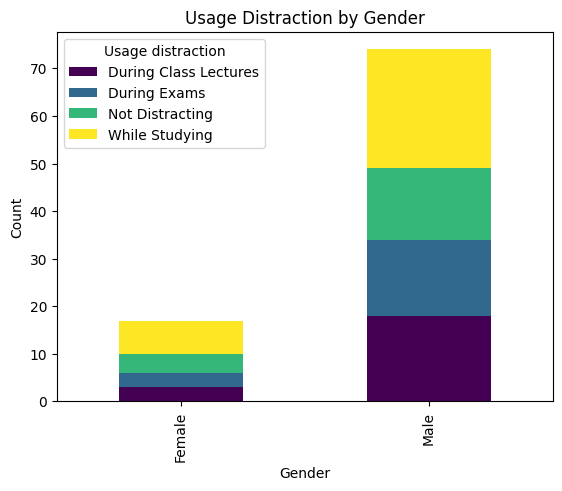

In [19]:
# Usage Distraction by Gender
distraction_by_gender = df.groupby(['Gender', 'Usage distraction']).size().unstack().fillna(0)
distraction_by_gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Usage Distraction by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Compares the types of distractions experienced by males and females, providing a clear picture of how mobile phone usage impacts attention.

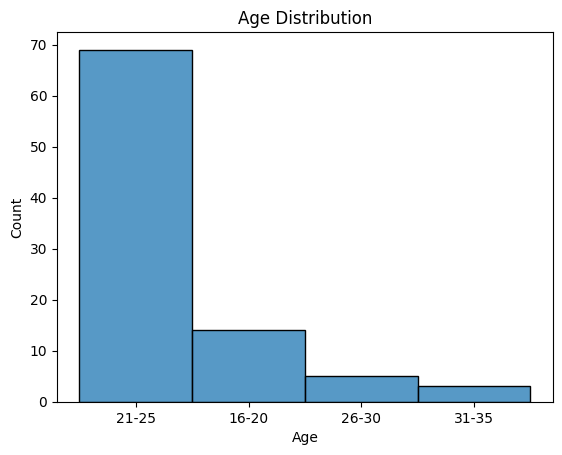

In [20]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

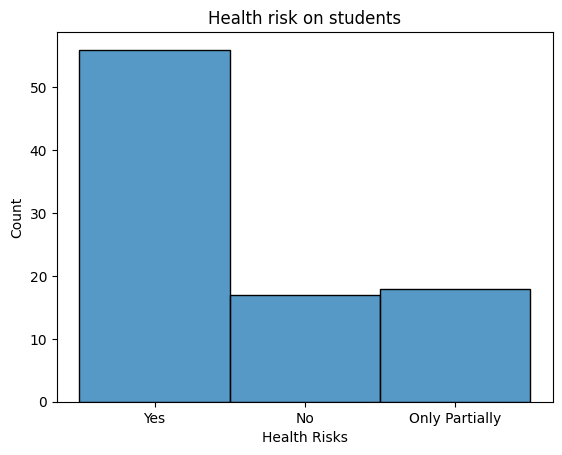

In [21]:
sns.histplot(df["Health Risks"])
plt.title("Health risk on students")
plt.show()